## **Face Similarity Matching for Multiple Face Classifier**


### **Import Desired Libraries**

In [70]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model, Sequential
from keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Activation, Dense, Dropout
from keras.preprocessing.image import load_img, save_img, img_to_array
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image
from PIL import Image

### **Define VGGface Model**

In [71]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

### **Load VGG Face Model Pretrained Weights**

In [72]:
# Pretained Weights: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
from keras.models import model_from_json

model.load_weights('vgg_face_weights.h5')

### **Define Vector Similarity Funtion**

In [97]:
# Define image preprocessing
def preprocess_image(image_path):
  img = load_img(image_path, target_size=(224, 224))
  img = img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = preprocess_input(img)

  return img


# Cosine Similarity
def find_cosine_distance(database, test):
  a = np.matmul(np.transpose(database), test)
  b = np.sum(np.multiply(database, database))
  c = np.sum(np.multiply(test, test))
  cosine_distance = 1 - (a / (np.sqrt(b) * np.sqrt(c)))

  return cosine_distance


# Euclidean Similarity
def find_euclidean_distance(database, test):
  euclidean_distance = database - test
  euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
  euclidean_distance = np.sqrt(euclidean_distance)

  return euclidean_distance

## **Define Face Verification Function**

In [100]:
# Define model input and output
vgg_face_descriptor = Model(inputs = model.layers[0].input, outputs = model.layers[-2].output)

epsilon1 = 0.23    # Cosine similarity
epsilon2 = 90      # Euclidean distance similarity

def verify_face(img1, img2):
  db_rep = vgg_face_descriptor.predict(preprocess_image(img1))[0,:]
  test_rep = vgg_face_descriptor.predict(preprocess_image(img2))[0,:]

  cosine_similarity = find_cosine_distance(db_rep, test_rep)
  euclidean_distance = find_euclidean_distance(db_rep, test_rep)

  fig = plt.figure()
  fig.add_subplot(1, 2, 1)
  plt.imshow(image.load_img(img1))
  plt.xticks([]); plt.yticks([])
  fig.add_subplot(1, 2, 2)
  plt.imshow(image.load_img(img2))
  plt.xticks([]); plt.yticks([])
  plt.show(block = True)

  if(cosine_similarity < epsilon1 and euclidean_distance < epsilon2):
    print("verified... they are same person")
    print(f"Cosine Similarity\t: {cosine_similarity}")
    print(f"Euclidean Distance\t: {euclidean_distance}")
  else:
    print("unverified! they are not same person!")
    print(f"Cosine Similarity\t: {cosine_similarity}")
    print(f"Euclidean Distance\t: {euclidean_distance}")

## **Code Testing**

1/1 [==============================] - 1s 550ms/step


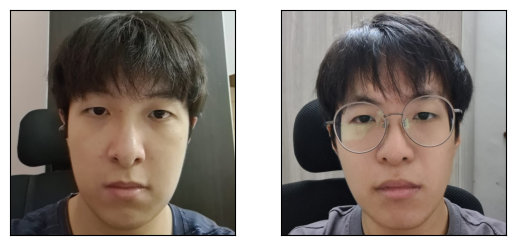

verified... they are same person
Cosine Similarity	: 0.16470730304718018
Euclidean Distance	: 51.52107238769531


In [102]:
verify_face('xh2.jpg', 'xh_1.jpg')